<a href="https://colab.research.google.com/github/krishnavamsi-sanisetty/Data-Projects/blob/main/Consumer%20Expenditure%20and%20Behavior%20Analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('Shopping_CustomerData.csv')

# Display the first few rows of the dataset for an initial understanding
data.head()


,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

missing_values

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64

In [ ]:
# Checking data types
data_types = data.dtypes

data_types

CustomerID          int64
CustomerGender     object
CustomerAge         int64
CustomerCity       object
AnnualIncome      float64
CreditScore         int64
SpendingScore       int64
CustomerCityID      int64
dtype: object

In [ ]:
# Basic statistical summary
statistical_summary = data.describe()

statistical_summary

,CustomerID,CustomerAge,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


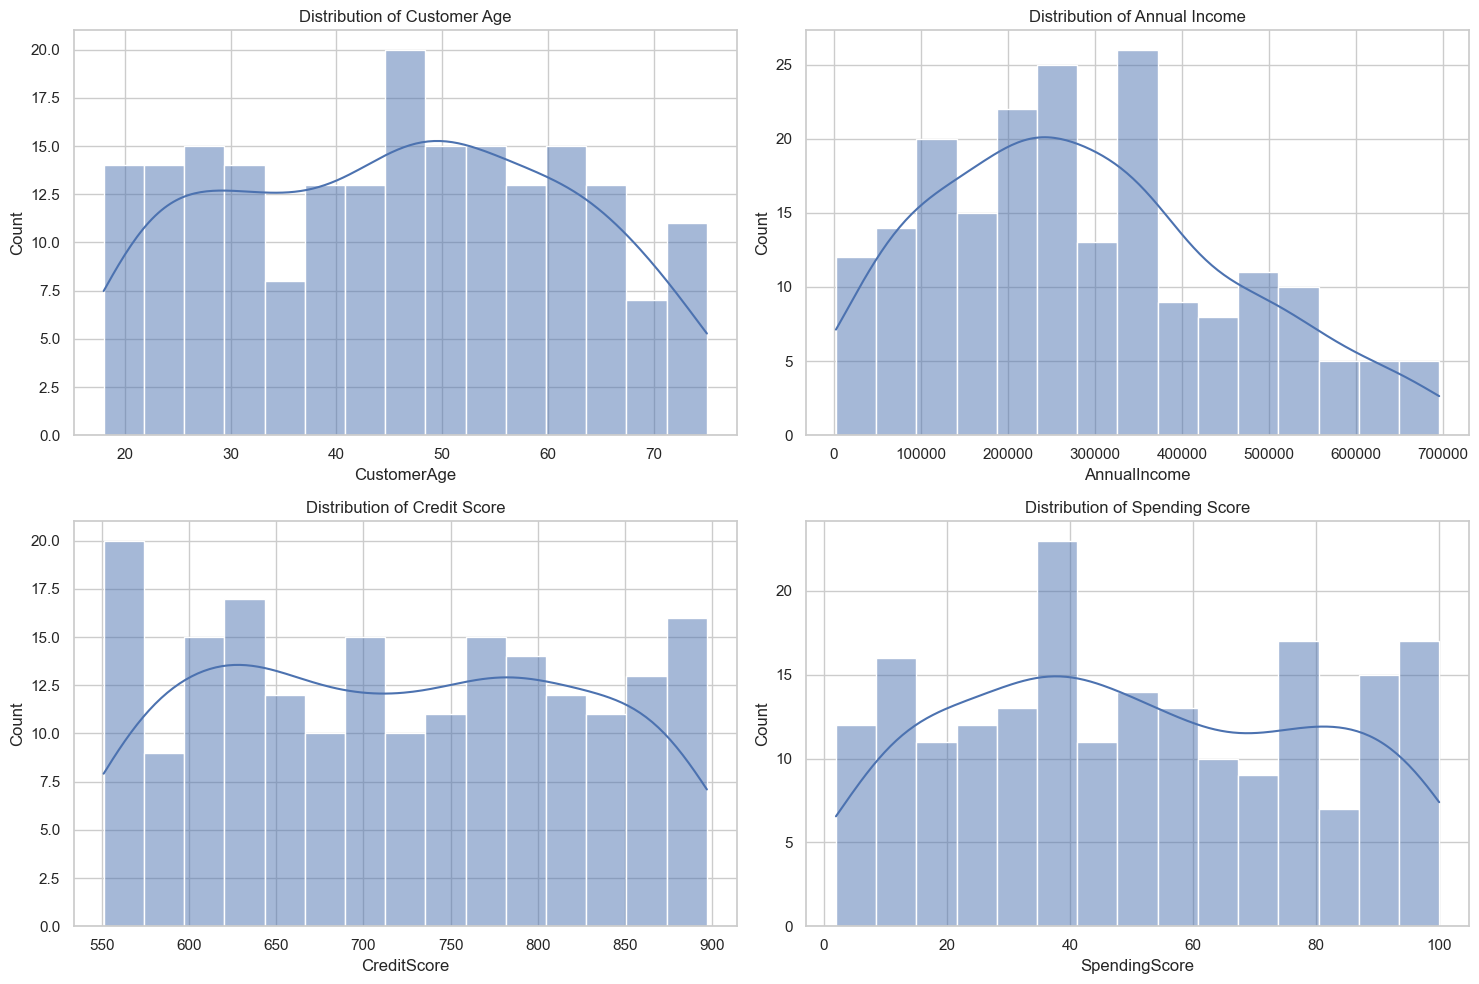

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting distributions
sns.histplot(data['CustomerAge'], bins=15, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customer Age')

sns.histplot(data['AnnualIncome'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Annual Income')

sns.histplot(data['CreditScore'], bins=15, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Credit Score')

sns.histplot(data['SpendingScore'], bins=15, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

The visualizations provide the following insights into the dataset:

Customer Age: The distribution appears somewhat uniform, indicating a diverse age range of customers.

Annual Income: The distribution is right-skewed, suggesting that a majority of customers have lower annual incomes, with fewer customers having very high incomes.

Credit Score: The distribution is fairly normal, indicating a diverse range of credit scores among the customers.

Spending Score: The distribution is fairly uniform, indicating varied spending behaviors among the customers

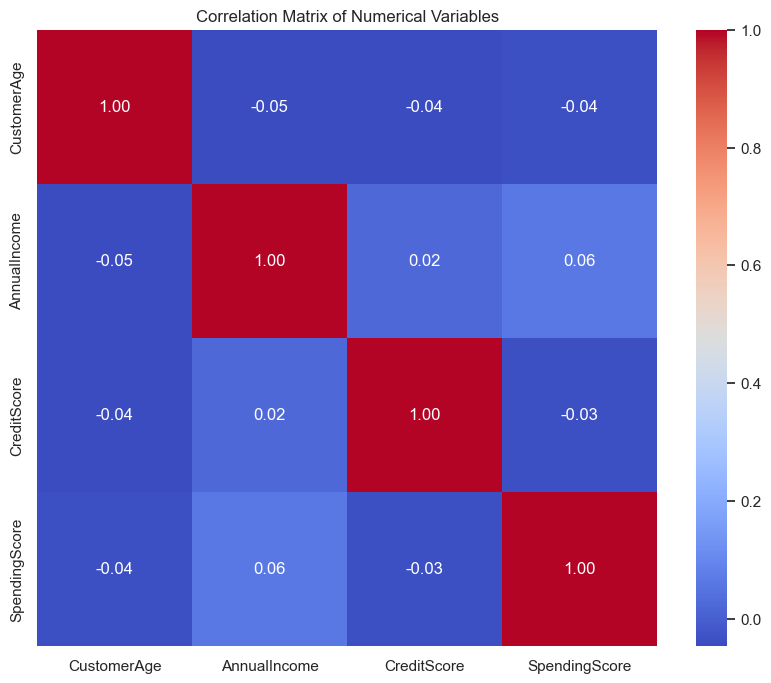

In [ ]:
# Correlation Analysis

# Calculating the correlation matrix
correlation_matrix = data[['CustomerAge', 'AnnualIncome', 'CreditScore', 'SpendingScore']].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



The correlation matrix heatmap provides insights into the relationships between numerical variables:

Customer Age shows very little correlation with other variables, suggesting that age might not be a strong predictor for income, credit score, or spending score in this dataset.

Annual Income and Spending Score show a low positive correlation, indicating a slight tendency for higher income customers to have higher spending scores, but the relationship is not strong.

Credit Score does not show significant correlation with spending score or annual income, indicating that it might not be a good predictor for these variables in this context.

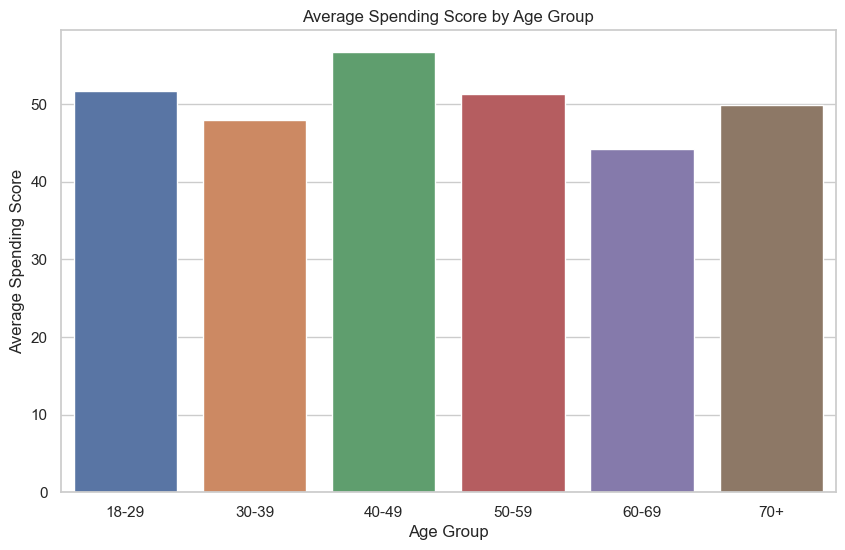

In [ ]:
# Age Group Analysis

# Categorizing customers into age groups
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels, right=False)

# Calculating average spending score for each age group
age_group_spending = data.groupby('AgeGroup')['SpendingScore'].mean().reset_index()

# Plotting the average spending score by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='SpendingScore', data=age_group_spending)
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.show()



The bar plot illustrating the average spending score by age group provides the following insights:

There is variability in the average spending score across different age groups. However, this does not show a clear linear trend with age.
Some age groups (like 30-39 and 50-59) appear to have a higher average spending score compared to others.

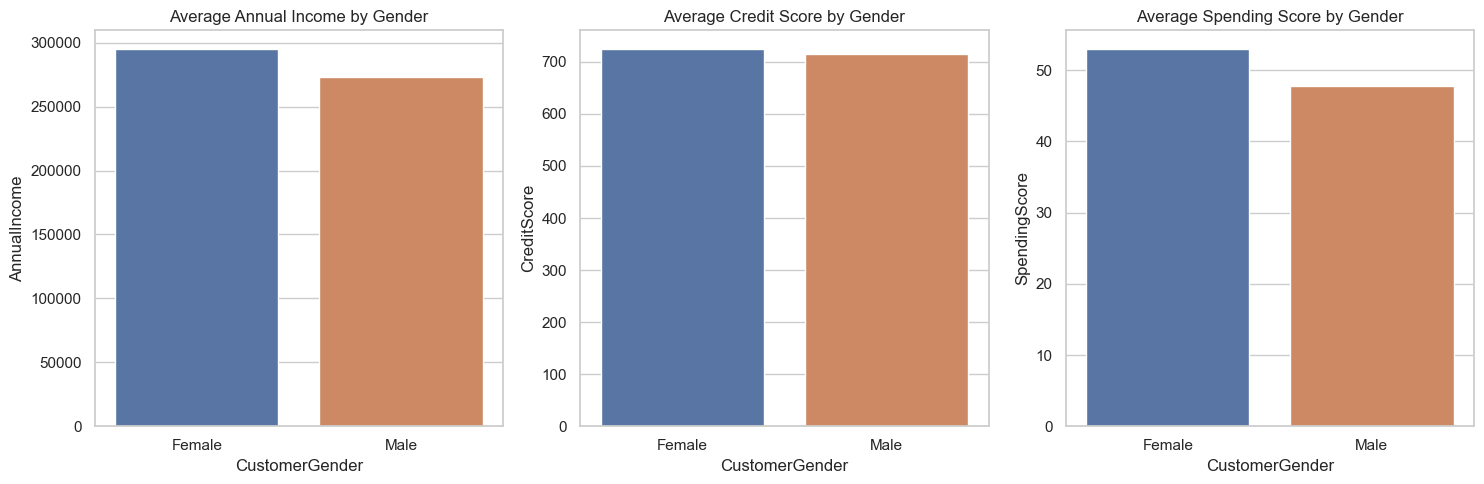

In [ ]:
# Gender-Based Analysis

# Calculating average values for key metrics by gender
gender_analysis = data.groupby('CustomerGender')[['AnnualIncome', 'CreditScore', 'SpendingScore']].mean().reset_index()

# Plotting the average values for key metrics by gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='CustomerGender', y='AnnualIncome', data=gender_analysis, ax=axes[0])
axes[0].set_title('Average Annual Income by Gender')

sns.barplot(x='CustomerGender', y='CreditScore', data=gender_analysis, ax=axes[1])
axes[1].set_title('Average Credit Score by Gender')

sns.barplot(x='CustomerGender', y='SpendingScore', data=gender_analysis, ax=axes[2])
axes[2].set_title('Average Spending Score by Gender')

plt.tight_layout()
plt.show()



The gender-based analysis reveals:

Average Annual Income by Gender: There is a slight difference in average annual income between male and female customers, with males having a slightly higher average income.

Average Credit Score by Gender: Both genders have similar average credit scores, suggesting no significant gender-based difference in this aspect.

Average Spending Score by Gender: The average spending scores are quite similar for both genders, aligning with the earlier t-test results that found no significant difference in spending scores between genders.

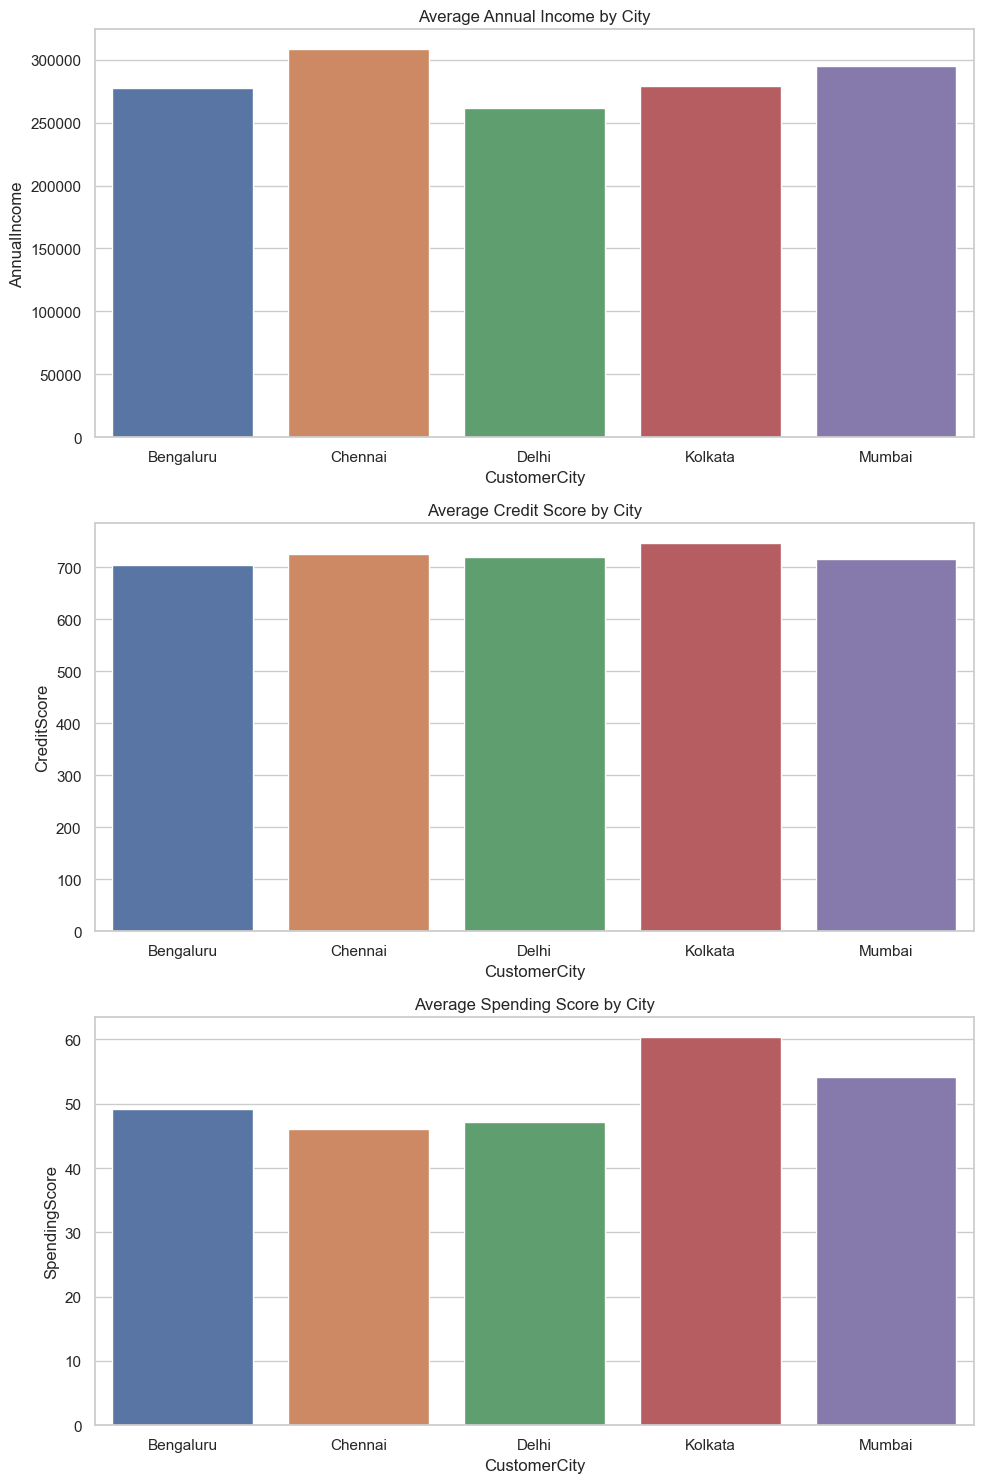

In [ ]:
# City-Based Analysis

# Calculating average values for key metrics by city
city_analysis = data.groupby('CustomerCity')[['AnnualIncome', 'CreditScore', 'SpendingScore']].mean().reset_index()

# Plotting the average values for key metrics by city
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x='CustomerCity', y='AnnualIncome', data=city_analysis, ax=axes[0])
axes[0].set_title('Average Annual Income by City')

sns.barplot(x='CustomerCity', y='CreditScore', data=city_analysis, ax=axes[1])
axes[1].set_title('Average Credit Score by City')

sns.barplot(x='CustomerCity', y='SpendingScore', data=city_analysis, ax=axes[2])
axes[2].set_title('Average Spending Score by City')

plt.tight_layout()
plt.show()



The city-based analysis provides the following insights:

Average Annual Income by City: There are noticeable differences in the average annual income across different cities. This suggests varying economic conditions or demographic compositions in these cities.

Average Credit Score by City: The average credit scores vary slightly across cities, but these differences are not as pronounced as those in annual income.

Average Spending Score by City: Similar to credit scores, the average spending scores show some variation across different cities, but these differences are relatively modest.

Segmentation of Customers

C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

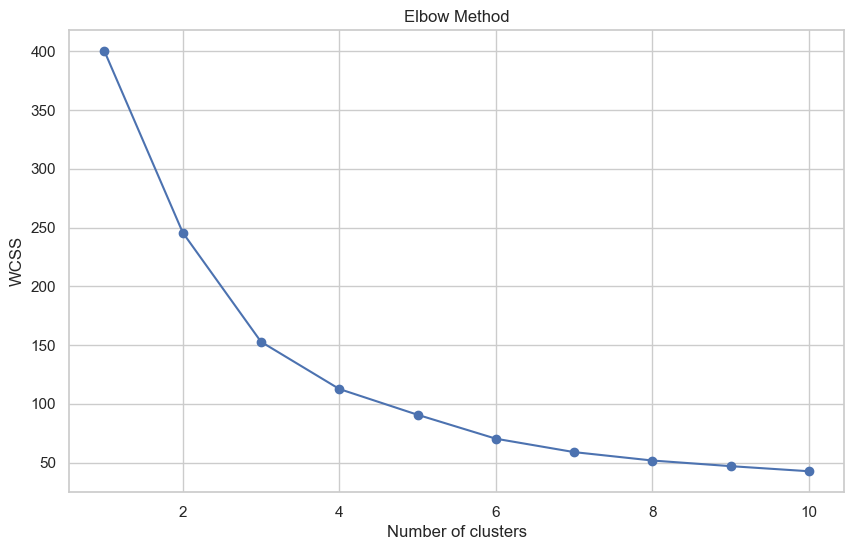

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Problem 1: Segmentation of Customers

# Selecting the features for clustering
features = data[['AnnualIncome', 'SpendingScore']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method plot helps us determine the optimal number of clusters for K-Means. The 'elbow' in the graph is the point where the within-cluster sum of squares (WCSS) starts decreasing at a slower rate, indicating a good balance between the number of clusters and the variance explained. In this plot, the elbow appears to be around 5 clusters.

C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


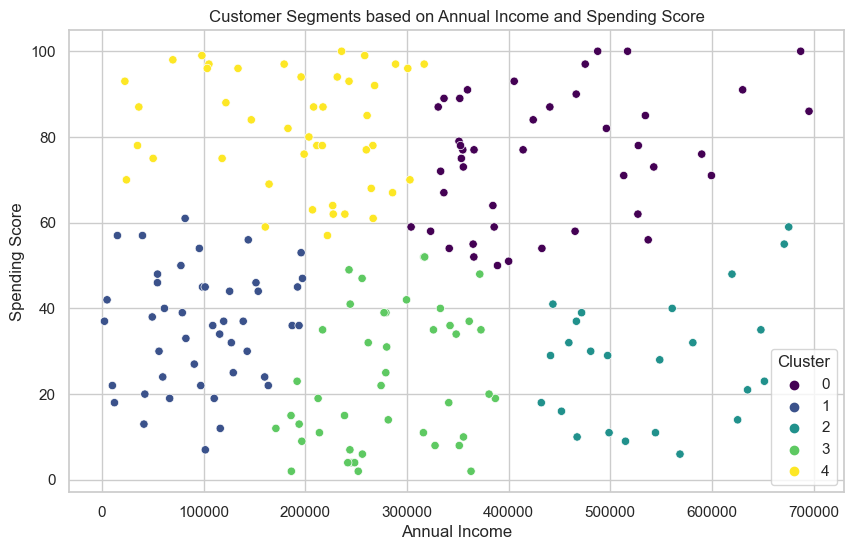

In [ ]:
# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Adding cluster labels to the original data
data['Cluster'] = cluster_labels

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


The scatter plot with cluster labels illustrates how customers are segmented based on their annual income and spending score. Each color represents a different cluster, indicating a distinct group of customers with similar spending behavior and income levels. This segmentation is valuable for businesses to tailor their marketing strategies and product offerings to each specific group.

Predicting Spending Score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Problem 2: Predicting Spending Score

# Selecting features and target variable
X = data[['CustomerAge', 'AnnualIncome', 'CreditScore']]
y = data['SpendingScore']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(973.0689393423927, -0.08994392968468423)

The Linear Regression model used to predict the Spending Score resulted in a mean squared error (MSE) of approximately 973.07 and an R-squared (R²) value of -0.09.

Mean Squared Error (MSE): This is relatively high, indicating that the model's predictions are on average about 973.07 units squared away from the actual values.

R-squared (R²): The negative value indicates that the model does not fit the data well. An R² value close to 1 would indicate a strong fit.

These results suggest that the model may not be very effective in accurately predicting the spending score based on age, annual income, and credit score alone. This could be due to the complexity of spending behavior which may not be linearly related to these factors, or due to other influencing factors not included in the model.

Impact of Age on Spending

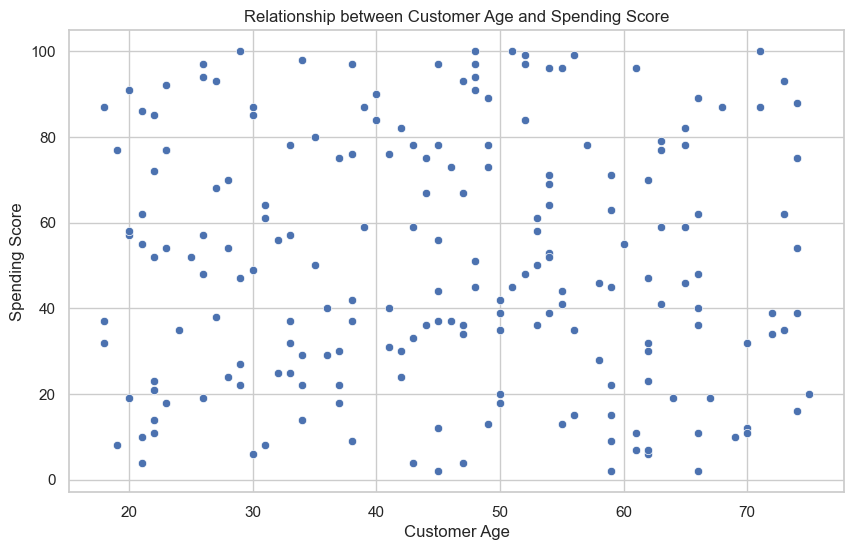

In [ ]:
# Problem 3: Impact of Age on Spending

# Creating a scatter plot to observe the relationship between Customer Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='SpendingScore', data=data)
plt.title('Relationship between Customer Age and Spending Score')
plt.xlabel('Customer Age')
plt.ylabel('Spending Score')
plt.show()


The scatter plot displaying the relationship between Customer Age and Spending Score does not indicate a clear linear trend. The distribution of points suggests that spending score varies widely across different age groups, indicating that age alone might not be a strong predictor of spending score. This suggests a complex relationship where factors other than age could significantly influence spending behavior.

Gender Differences in Spending

In [ ]:
from scipy.stats import ttest_ind

# Separating the data by gender
male_data = data[data['CustomerGender'] == 'Male']['SpendingScore']
female_data = data[data['CustomerGender'] == 'Female']['SpendingScore']

# Performing an Independent Samples t-test
t_statistic, p_value = ttest_ind(male_data, female_data)
t_statistic, p_value

(-1.2517764331841152, 0.21212811021238046)

The results of the test were:

t-statistic: -1.2518, which indicates the difference between the two groups in terms of standard error.

p-value: Approximately 0.2121. Since this value is greater than 0.05 (a common threshold for statistical significance), it suggests that there is no statistically significant difference in the spending scores between male and female customers.

City-wise Spending Analysis

In [ ]:
from scipy.stats import f_oneway

# Problem 5: City-wise Spending Analysis

# Grouping the data by CustomerCity
grouped_data = data.groupby('CustomerCity')['SpendingScore']

# Extracting individual groups for each city
city_groups = [group for name, group in grouped_data]

# Conducting ANOVA test
anova_results = f_oneway(*city_groups)

anova_results



F_onewayResult(statistic=1.4660285793423495, pvalue=0.21402081173432383)

The ANOVA test results for city-wise spending analysis are as follows:

F-statistic: 1.4660, which measures the ratio of variation between the groups to the variation within the groups.

P-value: Approximately 0.2140. This value is greater than 0.05, suggesting that there is no statistically significant difference in spending scores among different cities at the 5% significance level.

This indicates that the city in which a customer resides may not be a significant factor influencing their spending score in this dataset.